$$ \bf{EE0404\ SIGNAL\ PROCESSING\ APPLICATIONS} $$
$$ \ $$
$$ $$
$$ Lecture\ 4 $$

$$ Time-varying\ Phase\ Function\ and\ Chirp\ Signals$$

$$ July\ 2016 $$

# Time varying phase of sinusoidal signals

- Instantaneous Phase
- Instantaneous Angular Frequency
- Instantaneous Frequency
- Generation of Linear Chirp Signal 
- Generation of Sinusoidal Chirp Signal (Let’s have some fun!)



In [1]:
%pylab inline
from numpy.fft import *
from IPython import display

rcParams['figure.figsize']=(16,9)
rcParams['xtick.labelsize']='large'
rcParams['ytick.labelsize']='large'


Populating the interactive namespace from numpy and matplotlib


# Offset phase

$$ \begin{align} x(t) & = sin\left( 2\pi f (t +\Delta t) \right) \\ & = sin(2\pi f t + 2\pi f\Delta t   \\ & = sin(2\pi f t + \theta) \end{align}) $$
- If $\Delta t$ is constant, the sinusoidal signal is shifted in time by a constant duration
- Thus, the frequency of $x(t)$ does not change.
- What happens if $\Delta t$ also varies with time?


# Instantaneous vs. Offset Phase

$$ x(t) = sin(\phi (t))\ \ \ \rightarrow\ \ \ \phi(t) = 2\pi f t + \theta $$

- **Offset ($\theta $):** Initial angle of a sinusoidal function at its origin
- **Instantaneous Phase ($\phi(t) $):** Fraction of the wave cycle which has elapsed relative to the origin


# Instantaneous Angular Freqeuency

- **Instantaneous Angular Frequency** is the ratio of change in Instantaneous Phase with change in time.
$$\omega _{inst} = \dot\phi (t) = \frac{\Delta\phi (t)}{\Delta t}$$

- and **Instantaneous Frequency** is 
$$ f_{inst} = \frac{\omega_{inst}}{2\pi} $$


## a) Constant Offset Phase:
 

$$\begin{align} \omega_{inst} &= \dot\phi (t)= \frac{\partial (2\pi f t + \theta)}{\partial t} \\ \omega_{inst} &= 2\pi f \text{ [rad/s]} \end{align} $$


$$f_{inst} = \frac{\omega _{inst}}{2\pi } = f = \text{constant [Hz]} $$

- Thus, if offset phase is constant (not a function of time $t$), instantaneous angular frequency and freqeuncy are also constant terms.


# Example 1:

Generate and compare phase functions of 

$$ x(t) = sin\left( \phi_1 (t)\right)= sin(20\pi t) $$

$$ y(t) = sin \left( \phi_2 (t)\right)= sin(20\pi t + \pi / 2) $$


for $f_s$  = 100 Hz and time interval 0-500 ms.


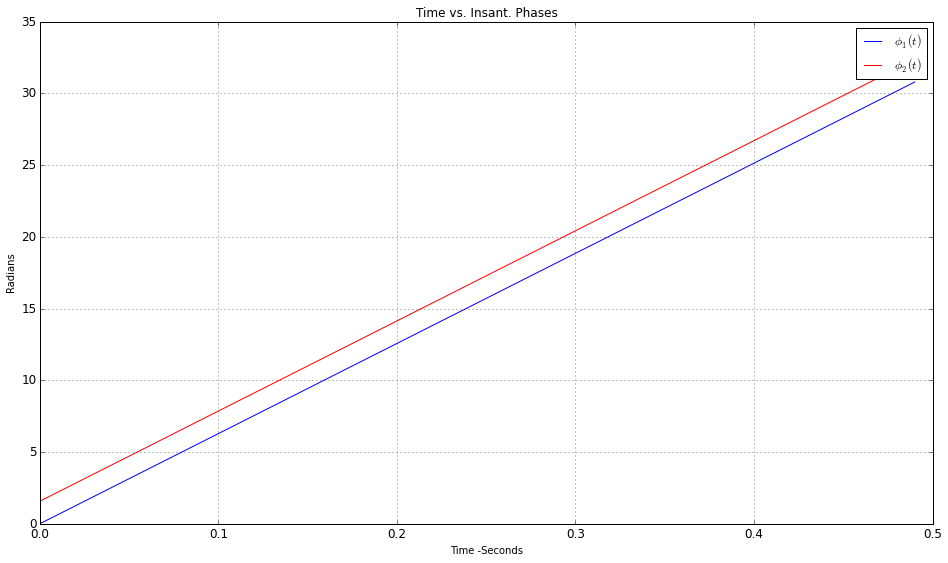

In [2]:
## Solution:
fs=100.0;
n = arange(.5*fs)
t = n/fs
phi1 = 20.0*pi*t; 
phi2 = phi1 +.5*pi;
x=sin(phi1); #to be used later
y=sin(phi2); #to be used later
plot(t,phi1);
grid(True)
hold(True)
plot(t,phi2,'r')
legend(('$\phi_1 (t)$','$ \phi_2(t)$'));
xlabel('Time -Seconds');
ylabel('Radians');
title('Time vs. Insant. Phases')


# Derivative: Difference in Discrete Time Domain

- We will now transform **instaneous phases** to **angular frequencies** by taking the derivatives.
- What is the corresponding operation for derivative in discrete time domain?

- What is the derivative of DC signal (or a constant) ?

# The diff() command

- Generate 10 samples of x(n) = 5 u(n)
- Calculate derivative via diff(x) 
- What is the dimension of resulting vector?

By this operation, we obtain new vectors with one missing element


### Codes

In [4]:
x = 5*ones((10))
print ' x = ', x

dx = diff(x)
print 'dx = ',dx

print 'Length of  x(n) is ', len(x)
print 'Length of dx(n) is ', len(dx)

  x =  [ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
dx =  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
Length of  x(n) is  10
Length of dx(n) is  9


- For $M$ element $x(n)$ vector diff(x(n)) calculates the differences by
$$ \Delta x (p) = x(p+1) - x(p), \ \ \ p=\{0,1,...,M-2\} $$

## Back to $\omega_{inst} $

- Using diff(x), we can now calculate the derivatives (?) of $ \phi_1(t) $ and $ \phi_2(t)$.

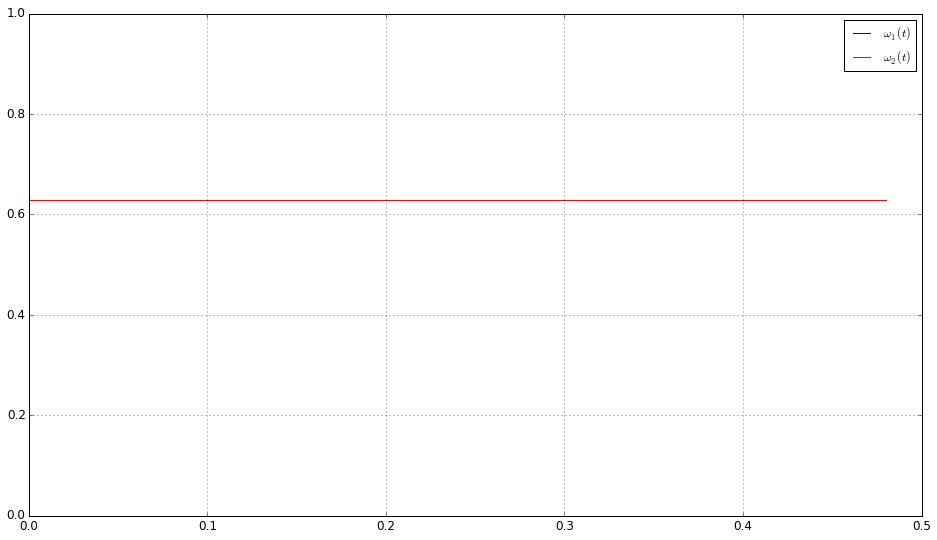

In [5]:
ang_inst1 = diff(phi1);
ang_inst2 = diff(phi2);
t2=t[:-1] # omit the last element of t

plot(t2, ang_inst1)
hold(True)
plot(t2, ang_inst2,'r')
ylim([0,1 ])
grid(True)
legend(('$\omega_1 (t)$','$\omega_2 (t)$'))

# Result Check 

- We know that $ \phi_1(t)  = 20\pi t $ and $ \omega_{inst} = 20\pi = 62.8 $
- But, the line in the previous figure yields to a value of almost 0.6. 
- This is because the discrete time domain difference should also include $T_s$ in the equation.

$$ \omega_{inst} = \dot\phi (t)= \frac{\partial \phi (t)}{\partial t} $$

$$\omega_{inst} = \dot\phi (n)= \frac{ \phi (n)- \phi (n-1)}{T_s}$$

$$ \omega_{inst} = \left( \phi (n)- \phi (n-1) \right) f_s $$

- Thus:

In [6]:
ang_inst1 = ang_inst1*fs
ang_inst2 = ang_inst2*fs

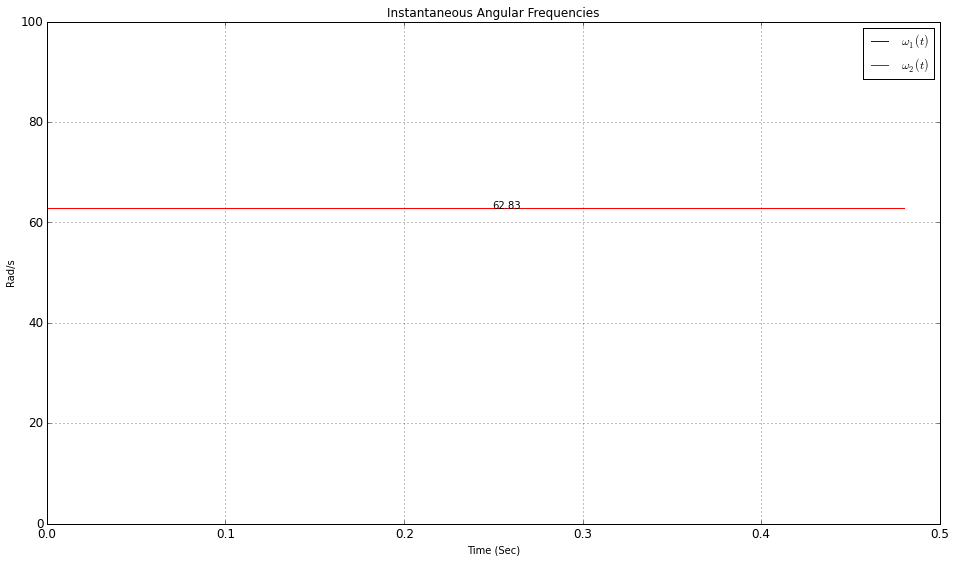

In [7]:
plot(t2, ang_inst1)
hold(True)
plot(t2, ang_inst2,'r')
ylim([0,100])
grid(True)
legend(('$\omega_1 (t)$','$\omega_2 (t)$'))
text(0.25,62.9, '62.83')
title('Instantaneous Angular Frequencies')
ylabel('Rad/s')
xlabel('Time (Sec)')

In [8]:
# Inst. Frequencies...
freq_inst1 = ang_inst1 / (2*pi)
freq_inst2 = ang_inst2 / (2*pi)

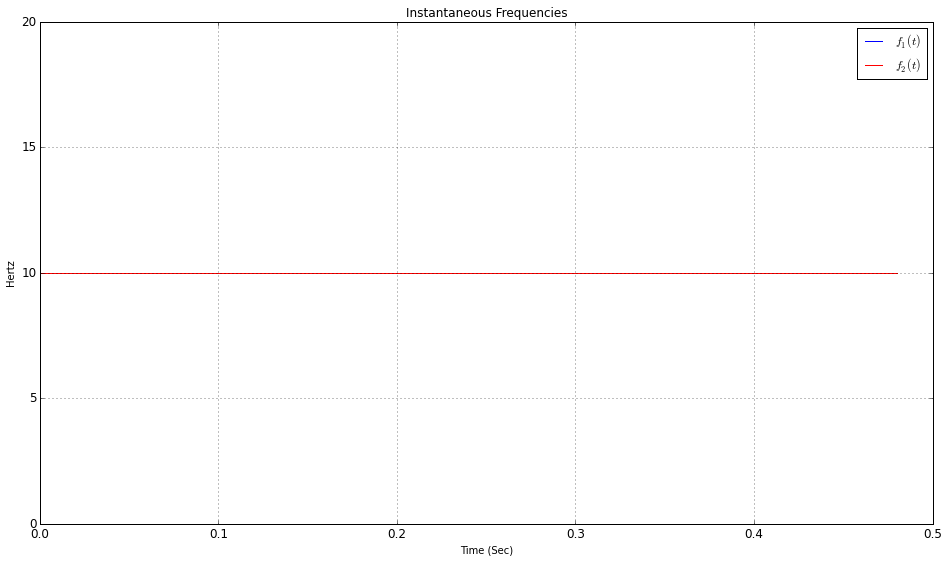

In [9]:
plot(t2, freq_inst1)
hold(True)
plot(t2, freq_inst2,'r')

grid(True)
legend(('$ f_1 (t) $','$ f_2 (t) $'))
ylim([0,20])
title('Instantaneous Frequencies')
ylabel('Hertz')
xlabel('Time (Sec)')

# b) Non-linear Phase function

# Example 2

$$ x(t) = sin(\phi_1 (t)) = sin(20\pi t) $$

$$ y(t) = sin(\phi_2 (t)) = sin(20\pi t^2) $$

- What are phase values for $t$ = 500ms?
- What about $t$ = 1 s ?
    - And 2 s ?
- make plots of $t$ vs. $\phi_i (t)$ for $t$ = 0 – 1 sec in a common figure for $f_s$ = 100 Hz.

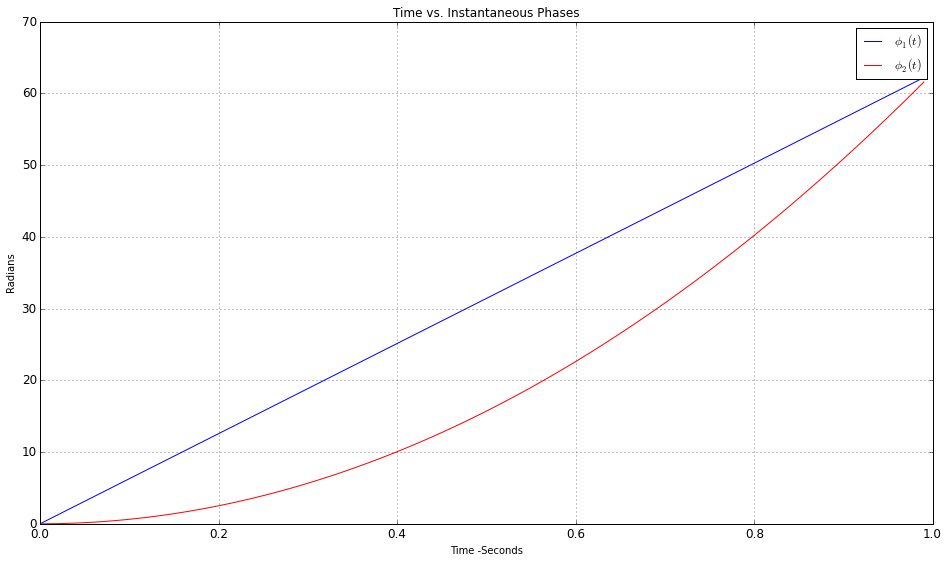

In [10]:
# Solution:

fs=100.0;
n = arange(fs)
t = n/fs
phi1 = 20.0*pi*t; 
phi2 = 20.0*pi*t*t
x = sin(phi1); #to be used later
y = sin(phi2); #to be used later
plot(t,phi1);
grid(True)
hold(True)
plot(t,phi2,'r')
legend(('$\phi_1 (t)$','$ \phi_2(t)$'));
xlabel('Time -Seconds');
ylabel('Radians');
title('Time vs. Instantaneous Phases')


## Instantaneous Ang. Frequencies

- $ \phi_1 (t) = 20\pi t $ and $ \omega _1 (t) = 20\pi $

- $ \phi_2 (t) = 20\pi t^2 $ and $ \omega _2 (t) = 40\pi t $

- The second signal’s inst. angular frequency is NOT CONSTANT and increases (linearly) with time


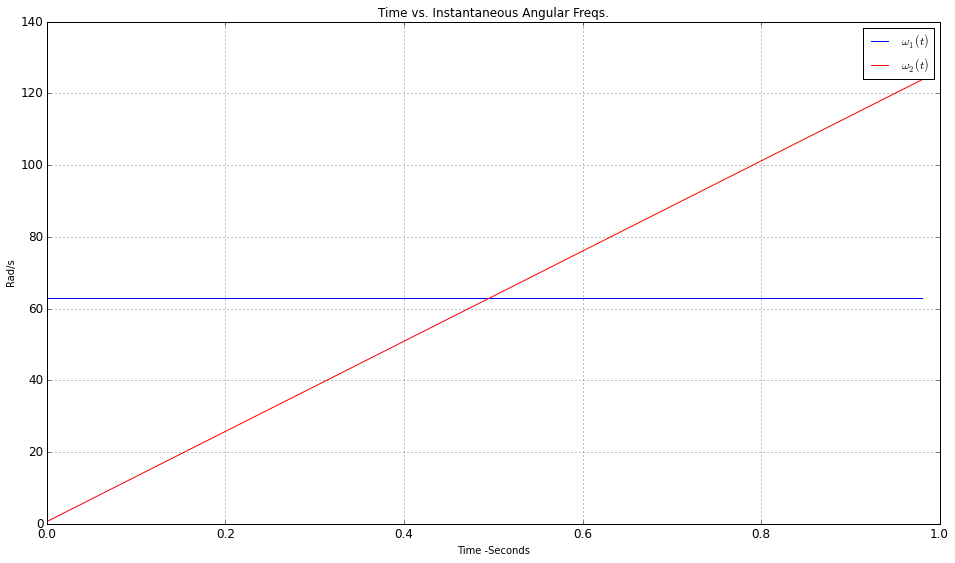

In [11]:
ang_inst1 = diff(phi1)*fs;
ang_inst2 = diff(phi2)*fs;
t2=t[:-1] 

plot(t2, ang_inst1)
hold(True)
plot(t2, ang_inst2,'r')
grid(True)
legend(('$\omega_1 (t)$','$\omega_2 (t)$'))
ylabel('Rad/s')
xlabel('Time -Seconds');
title('Time vs. Instantaneous Angular Freqs.')

In [12]:
# Inst. Frequencies...
freq_inst1 = ang_inst1 / (2*pi)
freq_inst2 = ang_inst2 / (2*pi)

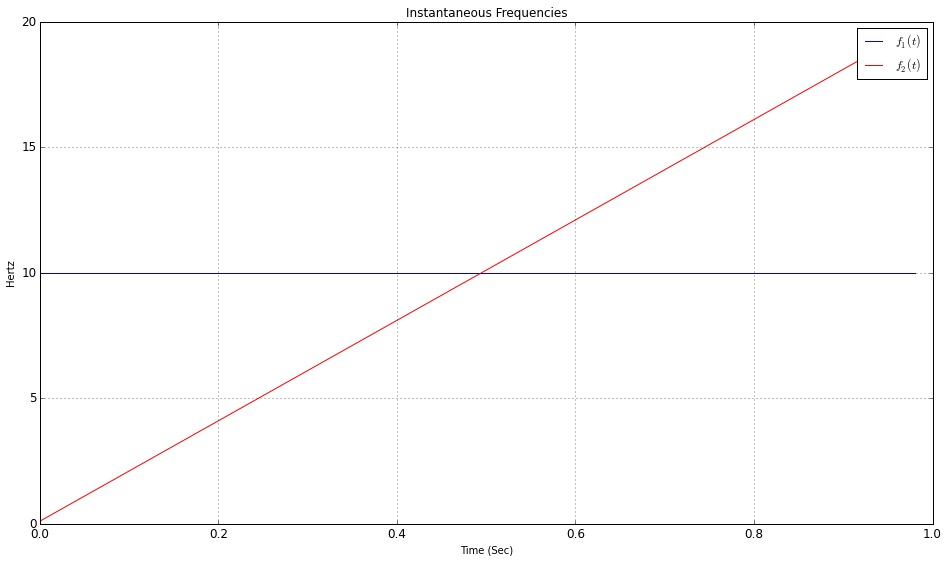

In [13]:
plot(t2, freq_inst1)
hold(True)
plot(t2, freq_inst2,'r')

grid(True)
legend(('$ f_1 (t) $','$ f_2 (t) $'))
ylim([0,20])
title('Instantaneous Frequencies')
ylabel('Hertz')
xlabel('Time (Sec)')

#  c) phase function with a sinusoidal shape

# Example 3:

- Consider a sinusoidal signal with instant frequency:
$$ f_{inst} = \frac{\omega_{inst}}{2\pi} = 1000 + 50sin(4\pi t) $$ 
- What should be the instantaneous phase of the signal?
- How would it sound like?



## Solution

- The solution, this time, requires integration with respect to $ t$.

$$ \phi (t) \to \left( \frac{\partial}{\partial t} \right) \to \omega_{inst} \to \left( \frac{1}{2\pi} \right) \to f_{inst}$$

so

$$ f_{inst}  \to (2\pi)  \to \omega_{inst} \to \left( \int ( )\,dt \right) \to \phi (t)$$

- Thus, we have

$$ \omega_{inst} = 2000\pi + 100\pi sin(4\pi t) $$ 

$$ \phi(t) = \int \left( 2000\pi + 100\pi sin(4\pi t) \right)\,dt $$ 
$$ \phi(t) = 2000\pi t - \frac {100\pi cos(4\pi t)} {4\pi}$$ 
$$ \phi(t) = 2000\pi t - 25 cos(4\pi t) $$

### Shape of instantaneous Frequency:



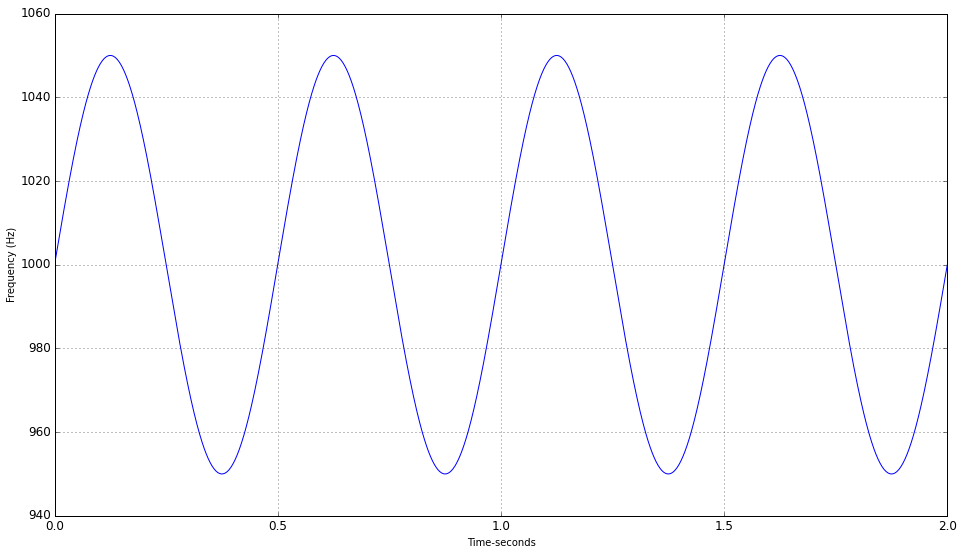

In [14]:
fs = 8000.0
n = arange(0,2*fs)
t = n/fs
f_inst = 1000 + 50*sin(4*pi*t)

plot(t,f_inst)
xlabel('Time-seconds')
grid(True)
ylabel('Frequency (Hz)')

### How does it sound like?

In [ ]:
# Method 1: using sounddevice module

from sounddevice import *
x = sin(2000*pi*t-25*cos(4*pi*t))

sound()

In [15]:
from IPython.display import Audio




Audio(data=x, rate=fs)


# Example 4 

- Calculate and plot the resulting **instantaneous frequency** shape if 

$$ \phi (t) = 2000\pi t - 100 cos(20\pi t) $$

